In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import empyrical
from WindPy import w
import os
%matplotlib inline

In [304]:
pd.options.mode.chained_assignment = None
DATA_DIR = 'D:/Data/derivatives/options/'

# 各期权历史价格

In [309]:
files = [f for f in os.listdir(DATA_DIR)]
dic = {}
for f in files:
    fname = '%s/%s'%(DATA_DIR, f)
    option_code = f.rstrip('.xlsx')
    tdf = pd.read_excel(fname, index_col=0)
    dic[option_code] = tdf['close']
opt_df = pd.DataFrame(dic)

In [310]:
opt_df.head()

,10000001.SH,10000002.SH,10000003.SH,10000004.SH,10000005.SH,10000006.SH,10000007.SH,10000008.SH,10000009.SH,10000010.SH,...,10001015.SH,10001016.SH,10001017.SH,10001018.SH,10001019.SH,10001020.SH,10001021.SH,10001022.SH,10001023.SH,10001024.SH
2015-02-09,0.1826,0.1460,0.1225,0.0942,0.0735,0.0617,0.0777,0.0969,0.1268,0.1542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-10,0.2072,0.1659,0.1367,0.1055,0.0855,0.0451,0.0578,0.0757,0.0975,0.1260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-11,0.2107,0.1702,0.1363,0.1050,0.0780,0.0321,0.0425,0.0564,0.0752,0.0992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-12,0.2109,0.1690,0.1323,0.1009,0.0736,0.0224,0.0320,0.0471,0.0657,0.0888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-13,0.2090,0.1677,0.1281,0.0925,0.0659,0.0159,0.0236,0.0350,0.0517,0.0730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


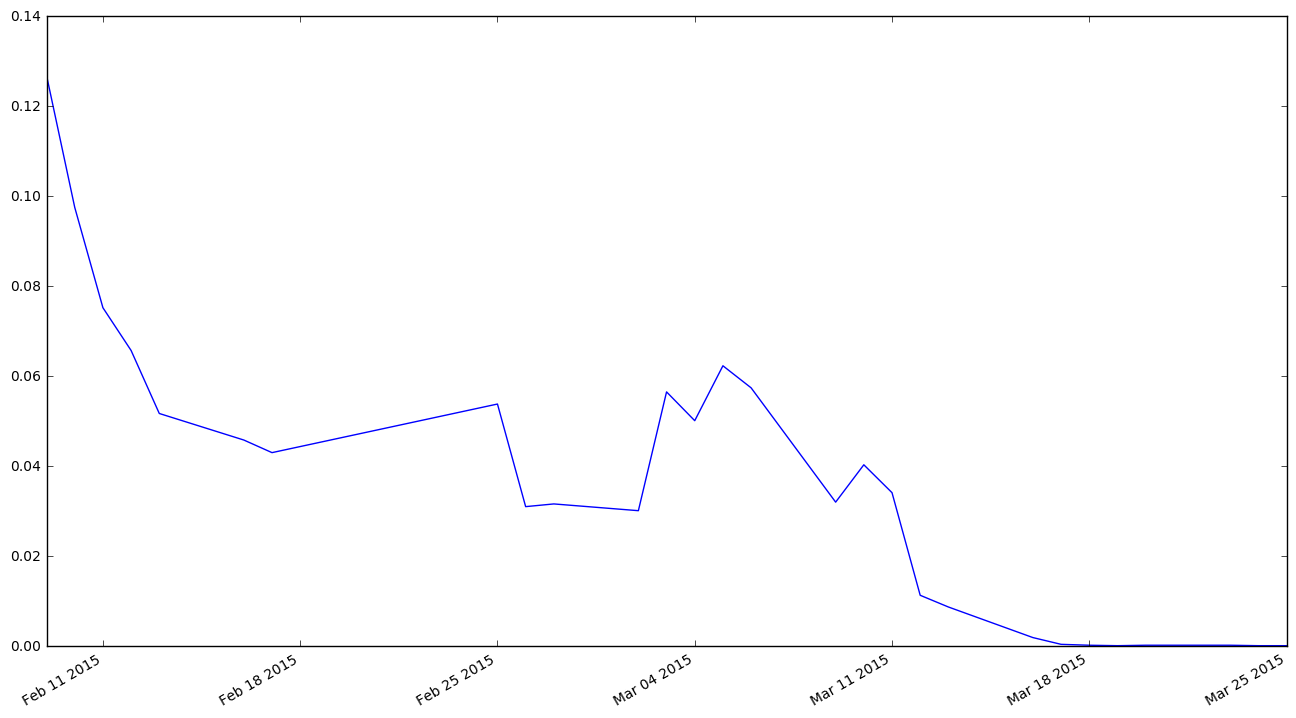

In [326]:
plt.figure(figsize=(16, 9))
opt_df['10000009.SH'].dropna().plot()

In [311]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [312]:
def wind2df(raw_data):
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[field.lower()] = data
    if len(raw_data.Times) == len(raw_data.Data[0]):
        return pd.DataFrame(dic, index=raw_data.Times)
    else:
        return pd.DataFrame(dic)

In [313]:
def metric(daily_ret):
    total_ret = empyrical.cum_returns_final(daily_ret)
    an_ret = empyrical.annual_return(daily_ret)
    sharpe = empyrical.sharpe_ratio(daily_ret)
    vol = empyrical.annual_volatility(daily_ret)
    maxdraw = empyrical.max_drawdown(daily_ret)
    print 'Total return: %.2f%%'%(total_ret*100)
    print 'Annual return: %.2f%%'%(an_ret*100)
    print 'Sharpe ratio: %.2f'%(sharpe)
    print 'Annual volatility: %.2f%%'%(vol*100)
    print 'Max drawdown: %.2f%%'%(maxdraw*100)

In [314]:
df = pd.read_excel('./putwrite.xlsx', index_col=0)

In [315]:
df.head(n=10)

,510050.SH,wind_code,strike,expire_date,option,im_vol
2015-02-09,2.331,10000009,2.35,2015-03-25,0.1268,0.376063
2015-02-10,2.369,10000009,2.35,2015-03-25,0.0975,0.343549
2015-02-11,2.380,10000010,2.40,2015-03-25,0.0992,0.289285
2015-02-12,2.384,10000010,2.40,2015-03-25,0.0888,0.265998
2015-02-13,2.390,10000010,2.40,2015-03-25,0.0730,0.228211
2015-02-16,2.394,10000010,2.40,2015-03-25,0.0687,0.228504
2015-02-17,2.411,10000010,2.40,2015-03-25,0.0639,0.241466
2015-02-25,2.370,10000009,2.35,2015-03-25,0.0538,0.252451
2015-02-26,2.450,10000042,2.45,2015-03-25,0.0667,0.261458
2015-02-27,2.438,10000042,2.45,2015-03-25,0.0713,0.261238


In [316]:
data = w.wsd('H11025.CSI', 'close', df.index[0].strftime('%Y-%m-%d'), df.index[-1].strftime('%Y-%m-%d'))
# data = w.wsd('065.CS', 'close', df.index[0].strftime('%Y-%m-%d'), df.index[-1].strftime('%Y-%m-%d'))

In [317]:
df['bond'] = wind2df(data)['close']

In [325]:
df.tail()

,510050.SH,wind_code,strike,expire_date,option,im_vol,bond
2017-10-16,2.781,10001020,2.8,2017-11-22,0.0385,0.095445,1443.3362
2017-10-17,2.779,10001020,2.8,2017-11-22,0.0382,0.092333,1443.4953
2017-10-18,2.802,10001020,2.8,2017-11-22,0.0281,0.096910,1443.6523
2017-10-19,2.806,10001020,2.8,2017-11-22,0.0287,0.104892,1443.8080
2017-10-20,2.790,10001020,2.8,2017-11-22,0.0330,0.096764,1443.9659


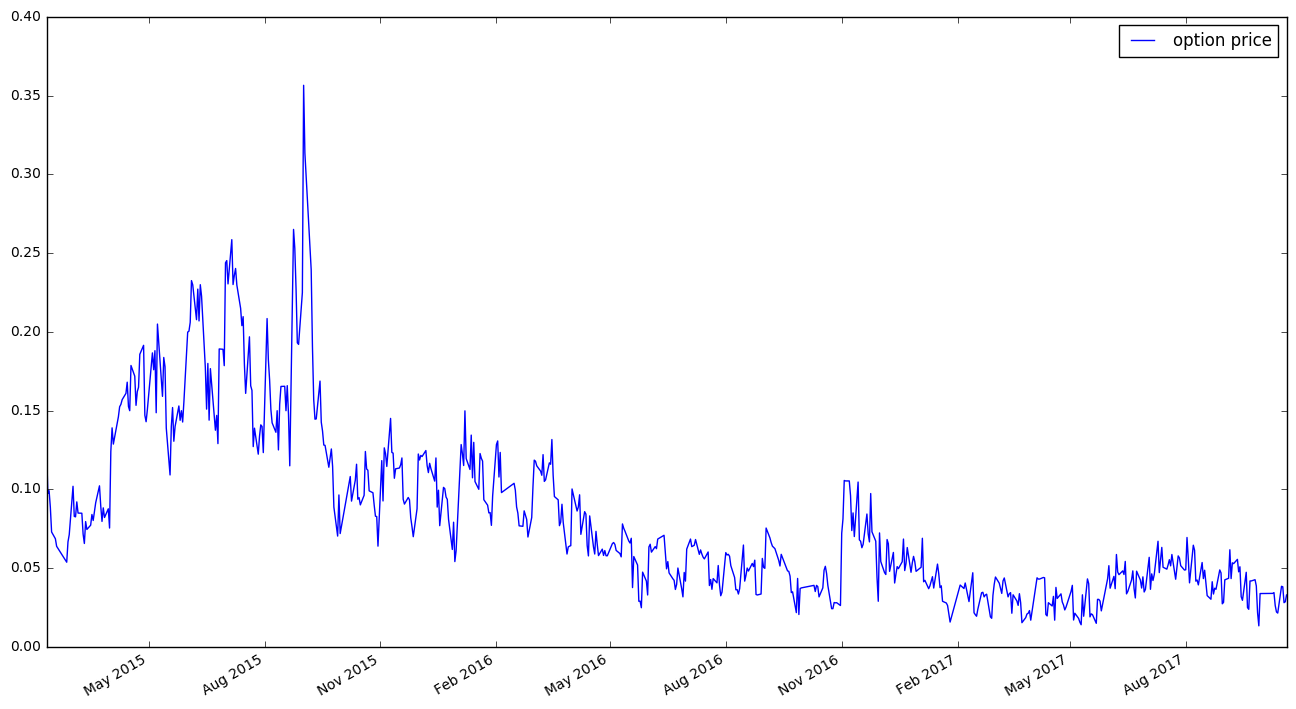

In [319]:
plt.figure(figsize=(16, 9))
df['option'].plot(label='option price')
# df['im_vol'].plot(label='implied volatility')
plt.legend()

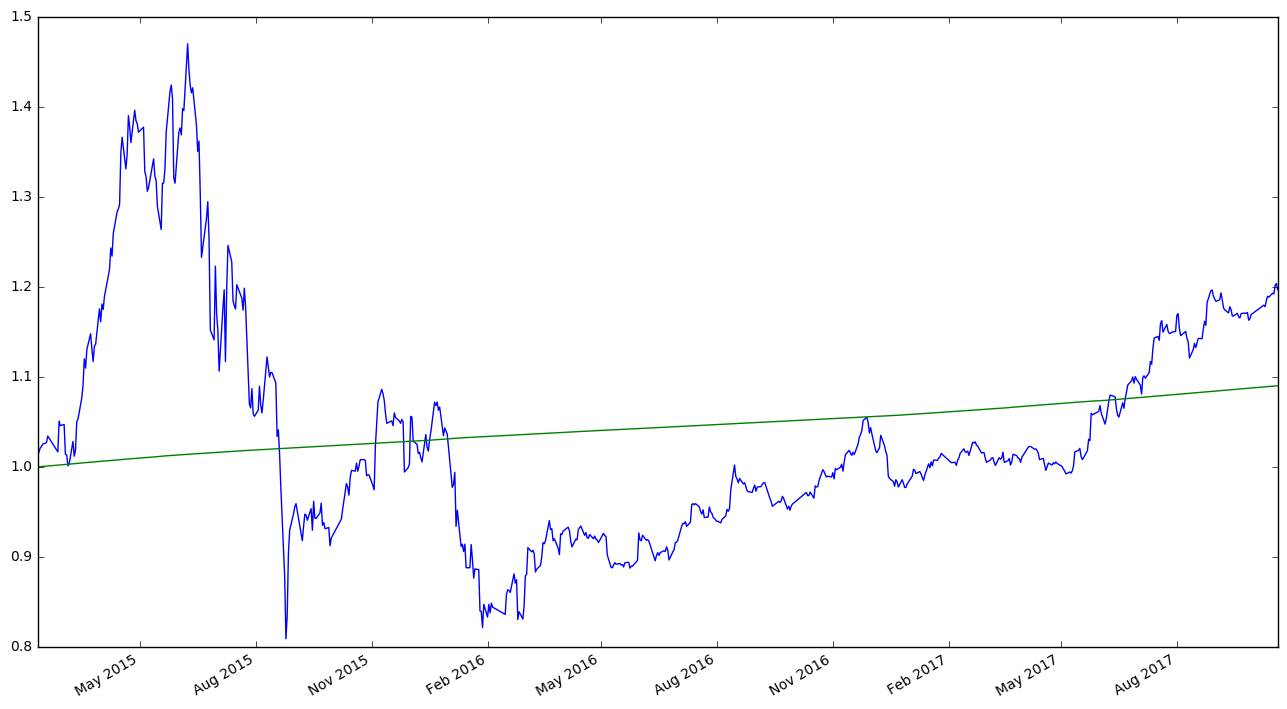

In [320]:
plt.figure(figsize=(16, 9))
(1+df['510050.SH'].pct_change()).cumprod().plot()
(1+df['bond'].pct_change()).cumprod().plot()

<Container object of 33 artists>

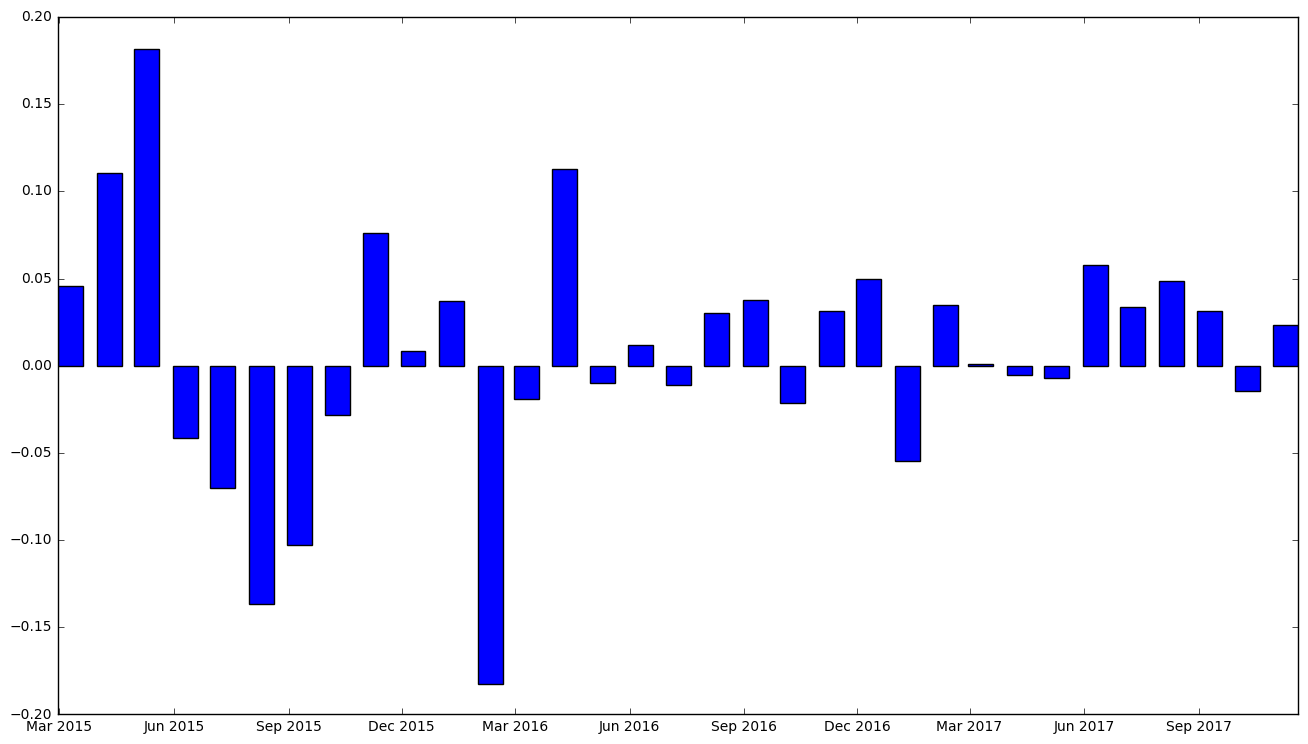

In [321]:
plt.figure(figsize=(16, 9))
month_ret = df['510050.SH'].pct_change().resample('M').apply(lambda x: empyrical.cum_returns_final(x))
plt.bar(month_ret.index, month_ret.values, width=20)

In [139]:
# back_up = df.copy()
# df = df[df.index >= '2016-06-01']

# putwrite策略1
第一天买入可能最大亏损金额那么多的期权，（每月）到期第二天续买

In [327]:
# months = pd.Series([(x.year, x.month) for x in df.index], index=df.index)
# rebalance_dates = months.drop_duplicates(keep='last').index

In [328]:
# rebalance_dates

In [413]:
df['principle'] = 0.
df['put'] = 0.
df['premium'] = 0.
df['number'] = 0
df['margin'] = 0.
principle = 1000000.0
one_piece = 10000
possible_loss = 1.
margin_per = 0.13
number = 0
margin = 0
start_date = df[df.index >= '2015-02-15'].index[0]
expire_date = ''
option_code = ''
bond_ret = df['bond'].pct_change()
bond_ret[0] = 0.

In [414]:
for date in df[df.index >= start_date].index:
    # 期权到期，执行期权
    if date == expire_date:
        principle -= number * one_piece * opt_df.loc[date][option_code]
        number = 0
        pass
    # 卖出看跌期权，获得权利金
    if date == start_date or number == 0:
        # 卖出新的看跌期权
        # 期权代码
        option_code = '%d.SH'%(df.loc[date]['wind_code'])
        # 下个到期日
        expire_date = df.loc[date]['expire_date']
        # 卖出最大标的面值份数的期权合约
        number = int(principle / (df.loc[date]['strike'] * possible_loss) / one_piece)
        print date, possible_loss, number, expire_date
        # 权利金
        premium = number * one_piece * df.loc[date, 'option']
        df.loc[date, 'premium'] = premium
        principle += premium
        
    # 合约张数
    df.loc[date, 'number'] = number
    # 保证金
    margin = (number * one_piece * df.loc[date, '510050.SH']) * margin_per
    df.loc[date, 'margin'] = margin
    # 期权合约的浮亏
    df.loc[date, 'put'] = -(number * one_piece * opt_df.loc[date][option_code])
    # 扣除保证金后的投资债券部分本金
    df.loc[date, 'principle'] = (principle - margin)

2015-02-16 00:00:00 1.0 41 2015-03-25 00:00:00
2015-03-25 00:00:00 1.0 39 2015-04-22 00:00:00
2015-04-22 00:00:00 1.0 33 2015-05-27 00:00:00
2015-05-27 00:00:00 1.0 33 2015-06-24 00:00:00
2015-06-24 00:00:00 1.0 35 2015-07-22 00:00:00
2015-07-22 00:00:00 1.0 37 2015-08-26 00:00:00
2015-08-26 00:00:00 1.0 40 2015-09-23 00:00:00
2015-09-23 00:00:00 1.0 40 2015-10-28 00:00:00
2015-10-28 00:00:00 1.0 40 2015-11-25 00:00:00
2015-11-25 00:00:00 1.0 39 2015-12-23 00:00:00
2015-12-23 00:00:00 1.0 39 2016-01-27 00:00:00
2016-01-27 00:00:00 1.0 42 2016-02-24 00:00:00
2016-02-24 00:00:00 1.0 41 2016-03-23 00:00:00
2016-03-23 00:00:00 1.0 41 2016-04-27 00:00:00
2016-04-27 00:00:00 1.0 42 2016-05-25 00:00:00
2016-05-25 00:00:00 1.0 44 2016-06-22 00:00:00
2016-06-22 00:00:00 1.0 44 2016-07-27 00:00:00
2016-07-27 00:00:00 1.0 42 2016-08-24 00:00:00
2016-08-24 00:00:00 1.0 41 2016-09-28 00:00:00
2016-09-28 00:00:00 1.0 43 2016-10-26 00:00:00
2016-10-26 00:00:00 1.0 41 2016-11-23 00:00:00
2016-11-23 00

In [415]:
df.tail()

,510050.SH,wind_code,strike,expire_date,option,im_vol,bond,principle,put,premium,number,margin,interest sum,total
2017-10-16,2.781,10001020,2.8,2017-11-22,0.0385,0.095445,1443.3362,917049.6,-228.0,0.0,38,137381.4,1.018012e+06,1.158774e+06
2017-10-17,2.779,10001020,2.8,2017-11-22,0.0382,0.092333,1443.4953,917148.4,-190.0,0.0,38,137282.6,1.018234e+06,1.158935e+06
2017-10-18,2.802,10001020,2.8,2017-11-22,0.0281,0.096910,1443.6523,916012.2,-76.0,0.0,38,138418.8,1.017074e+06,1.159058e+06
2017-10-19,2.806,10001020,2.8,2017-11-22,0.0287,0.104892,1443.8080,915814.6,-38.0,0.0,38,138616.4,1.016963e+06,1.159188e+06
2017-10-20,2.790,10001020,2.8,2017-11-22,0.0330,0.096764,1443.9659,916605.0,-38.0,0.0,38,137826.0,1.017958e+06,1.159372e+06


In [416]:
df['interest sum'] = df['principle'] * (1 + df['bond'].pct_change()).cumprod()

In [417]:
df['total'] = df['interest sum'] + df['put'] + df['margin']

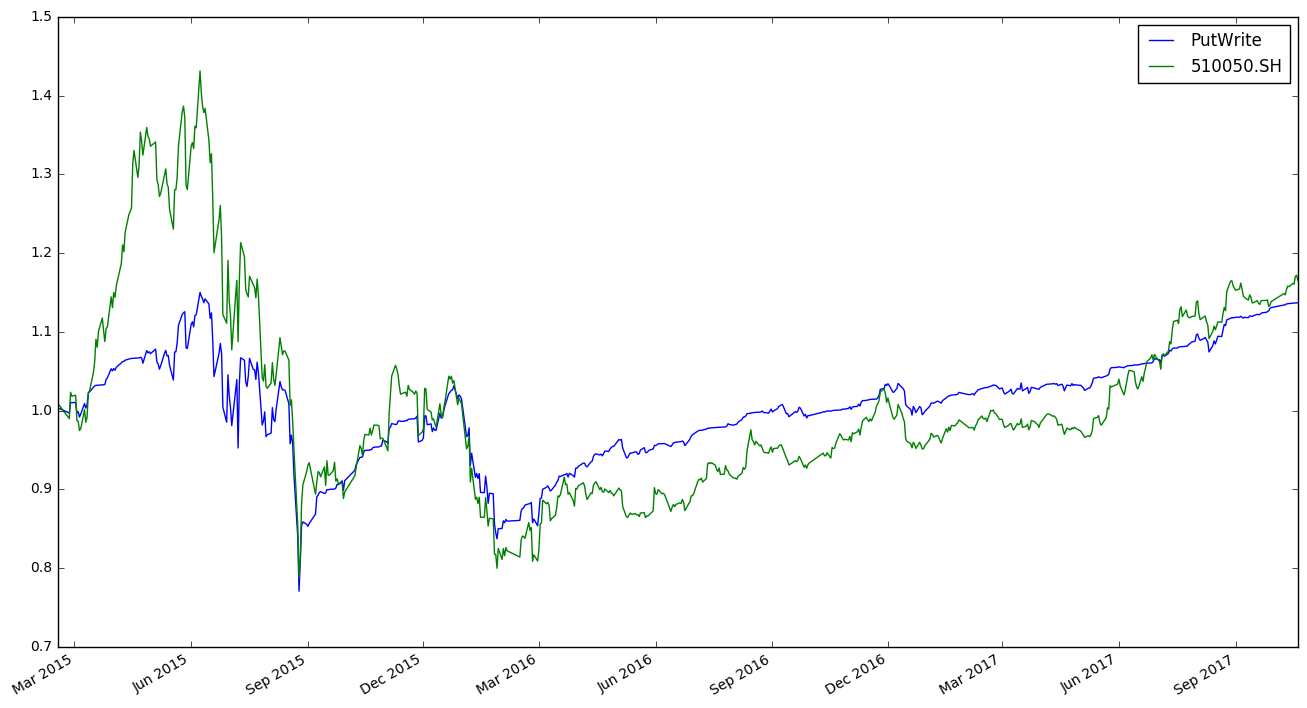

In [418]:
principle = 1000000.0
plt.figure(figsize=(16, 9))
(df[df.index >= start_date]['total'] / principle).plot(label='PutWrite')
(1 + df[df.index >= start_date]['510050.SH'].pct_change()).cumprod().plot(label=u'510050.SH')
# (1+df[df.index >= start_date]['bond'].pct_change()).cumprod().plot()
plt.legend()

In [419]:
principle = 1000000.0
metric(pd.Series([principle]).append(df[df.index >= start_date]['total']).pct_change())

Total return: 13.71%
Annual return: 5.08%
Sharpe ratio: 0.35
Annual volatility: 19.35%
Max drawdown: -32.99%


In [420]:
metric(df[df.index >= start_date]['510050.SH'].pct_change())

Total return: 16.54%
Annual return: 6.09%
Sharpe ratio: 0.36
Annual volatility: 27.03%
Max drawdown: -44.97%
